# Dữ liệu chuỗi thời gian

## Khái niệm

Dữ liệu chuỗi thời gian (time series data) là những điểm dữ liệu đã được đánh indice theo thời gian và có khoảng cách đều nhau giữa những quan sát liên tiếp. 

VD: dữ liệu về giá chứng khoán hàng ngày, tổng thu nhập quốc dân của một quốc gia hàng năm, tổng doanh số công ty hàng quý,....

Ưu điểm: 
- lưu trữ được trạng thái của một trường dữ liệu theo thời gian. 
- có tính ứng dụng rất cao và được áp dụng trong: _thống kê, kinh tế lượng, toán tài chính, dự báo thời tiết, dự đoán động đất, điện não đồ, kỹ thuật điều khiển, thiên văn, kỹ thuật truyền thông, xử lý tín hiệu_.

In [79]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

url = "https://raw.githubusercontent.com/phamdinhkhanh/tabml/main/sales-of-shampoo-over-a-three-ye.csv"
df = pd.read_csv(url, header=0)
df["Month"] = df['Month'].apply(lambda x: pd.to_datetime("200"+x))
df.set_index("Month", inplace=True)
df.head(2)

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9


In [80]:
df.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


`Note:` Trung bình mỗi tháng bán được 312.6 đơn vị sản phẩm, tháng thấp nhất là 119.3 và cao nhất là 682. Độ lệch so với trung bình của các tháng là 148.94 đơn vị. Đây là chuỗi có phân phối lệch về bên phải vì _median_ > _mean_.

## Tính chất

- Tính xu hướng (trend): là yếu tố thể hiện xu hướng thay đổi của dữ liệu theo thời gian. 
    - VD: giá cả thị trường chịu ảnh hưởng của lạm phát, dân số thế giới tăng qua các năm, nhiệt độ trung bình trái đất tăng theo thời gian,.... 

    - Ảnh hưởng tới việc đưa ra nhận định về mối quan hệ tương quan giữa các chuỗi số. Về bản chất, các chuỗi không tương quan nhưng do có chung xu hướng nên bị nhận định là tương quan. Do đó, khi xây dựng mô hình, cần loại bỏ yếu tố xu hướng ở những biến input để tìm ra những chuỗi có sự tương quan thực sự.
    - VD: Số lượng người bị đuối nước hàng năm và sản lượng kem tiêu thụ có mối quan hệ tương quan tuyến tính dương,  do cùng tương quan với nhiệt độ. Tuy nhiên việc ăn kem không phải là nguyên nhân trực tiếp dẫn tới đuối nước.

- Tính chu kỳ (cyclic patterns) và mùa vụ (seasonality): Là qui luật có tính chất lặp lại của dữ liệu theo thời gian.
    - VD: Sự thay đổi thời tiết, sự phát triển của các loài động vật, hành vi mua sắm, tiêu dùng của con người.

    - Giúp ích cho việc dự báo chính xác hơn. 
    - VD: doanh nghiệp sẽ biết sản lượng tăng vào thời điểm nào trong năm? Cần phải tuyển thêm bao nhiêu lao động? Mua thêm bao nhiêu nguyên vật liệu để đáp ứng được nhu cầu thị trường? Nhờ hiểu được tính chu kỳ của chuỗi thời gian.

## Types of Time Series Data

**Univariate vs Multivariate Time Series:**

- **Univariate:** A single variable or feature recorded over time (e.g., daily temperature).
- **Multivariate:** Multiple variables recorded over time (e.g., daily temperature, humidity, and wind speed).

**Regular vs Irregular Time Series:**

- **Regular:** Data points are recorded at consistent time intervals (e.g., hourly, daily).
- **Irregular:** Data points are recorded at inconsistent time intervals.

## Phát hiện outliers

- Tần xuất: thường xuyên xuất hiện trong chuỗi thời gian. 

- Nguyên nhân: sự cố, cú sốc kinh tế, thiên tai, dịch bệnh,.... 

- Mục tiêu: cần được loại bỏ hoặc thay thế vì nằm ngoài qui luật có thể dự báo được của mô hình. 

- Phương pháp: thông qua biểu đồ (nhanh, mang tính tương đối) hoặc định lượng (dựa trên tiêu chuẩn cụ thể).

### Biểu đồ line

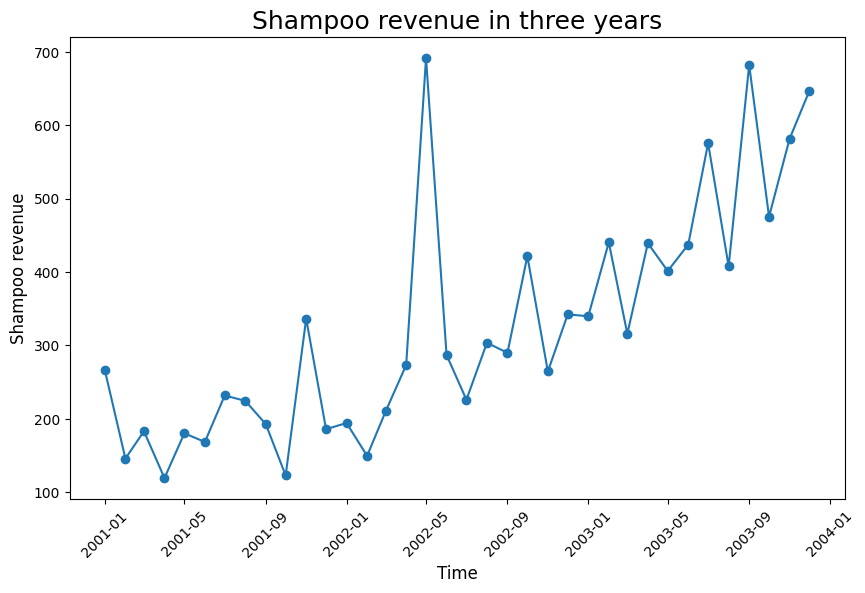

In [81]:
import matplotlib.pyplot as plt

# Điểm dữ liệu 05-2002 tăng 500 đơn vị để tạo outlier giả định.
df.loc["2002-05","Sales"] += 500

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], marker="o")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

`Note:` dữ liệu vào tháng _05-2002_ là outlier vì giá trị của nó vượt xa so với những điểm xung quanh và nằm ra ngoài xu hướng của chuỗi.

### Biểu đồ box-plot

Kết hợp giữa đồ thị và định lượng. Gồm các ngưỡng chia:
- $Q_1$: mức phân vị 25%
- $Q_2$ (median): mức phân vị 50%
- $Q_3$: mức phân vị 75%

`Note:` mức phân vị x% là giá trị mà có x% quan sát nhỏ hơn giá trị này

Gồm các quan sát (*không tính outliers*) thuộc các miền giá trị:
* Miền giá trị thấp nhất: $[min, Q_1)$.
* Miền giá trị thấp: $[Q_1, Q_2)$.
* Miền giá trị cao: $[Q_2, Q_3)$.
* Miền giá trị cao nhất: $[Q_3, max]$.

Outliers được xác định bởi chỉ số $IQR = Q_3-Q_1$:
$$
x \equiv \text{outliers} \leftrightarrow
\left\{
\begin{aligned}
x < Q_1 - 1.5 \times IQR \\
x > Q_3 + 1.5 \times IQR
\end{aligned}
\right.
$$

`Note:` các giá trị rất thấp ở đầu chuỗi và rất cao ở cuối chuỗi rất dễ bị nhận nhầm thành outliers do ảnh hưởng của trend. Loại bỏ trend sẽ giúp cho ta đánh giá được đâu mới thực sự là outliers.

Loại bỏ trend bằng cách lấy sai phân bậc 1.

In [82]:
diff_sales = df["Sales"][1:].values - df["Sales"][:-1].values

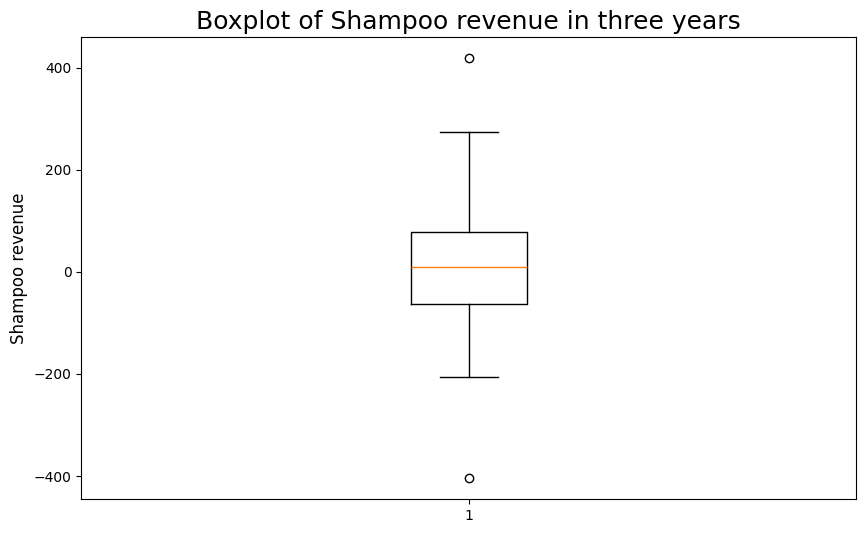

In [83]:
plt.figure(figsize=(10, 6))
plt.boxplot(diff_sales)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.title("Boxplot of Shampoo revenue in three years", fontsize=18)
plt.show()

Tìm indice của 2 điểm outliers:

In [84]:
import numpy as np

def detect_outliers(series):
    """series: 1-D numpy array input"""
    Q1 = np.quantile(series, 0.25)
    Q3 = np.quantile(series, 0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    lower_compare = series <= lower_bound
    upper_compare = series >= upper_bound
    outlier_idxs = np.where(lower_compare | upper_compare)[0]
    return outlier_idxs

outlier_idxs = detect_outliers(diff_sales)
print("Outlier indices: ", outlier_idxs)
print("Outlier months: ", df.index[outlier_idxs+1].values)
print("Outlier values: ", diff_sales[outlier_idxs])

Outlier indices:  [15 16]
Outlier months:  ['2002-05-01T00:00:00.000000000' '2002-06-01T00:00:00.000000000']
Outlier values:  [ 418.1 -404.4]


`Note:` tháng 05/2002 và 06/2002 là những tháng xuất hiện outliers.

`Ngoài ra:` Z-score cũng được dùng để loại bỏ outliers

## Phát hiện yếu tố chu kỳ và mùa vụ

1. thông qua quan sát biểu đồ.

- cần quan sát trong khoảng thời gian dài để nhận định được củng cố. Quy luật mùa vụ sẽ lặp lại theo một số chu kỳ phổ biến:
    * 4 quí trong 1 năm. VD: GPD, kim ngạch xuất nhập khẩu,...
    * 12 tháng trong 1 năm. VD: doanh thu, du lịch, dịch vụ,...
    * 7 ngày trong 1 tuần. VD: quy luật mua sắm, tiêu dùng, vui chơi giải trí,...

- cần biết chuỗi đang phân tích thuộc ngành nghề, lĩnh vực nào, từ đó nhận định quy luật của chuỗi và kiểm chứng lại trên đồ thị.

2. sử dụng các chỉ số định lượng về **tự tương quan**.

Hệ số tự tương quan ứng với độ trễ (lag) là hệ số tương quan giữa điểm dữ liệu $x_t$ và $x_{t-l}$:

$$\rho(l) = \frac{cov(x_t,x_{t-l})}{\sqrt{\sigma_t\sigma_{t-l}}}$$

Ở đây, $l$ là độ trễ và $x_{t-l}$ là giá trị trễ $l$ phiên của chuỗi $x_t$.

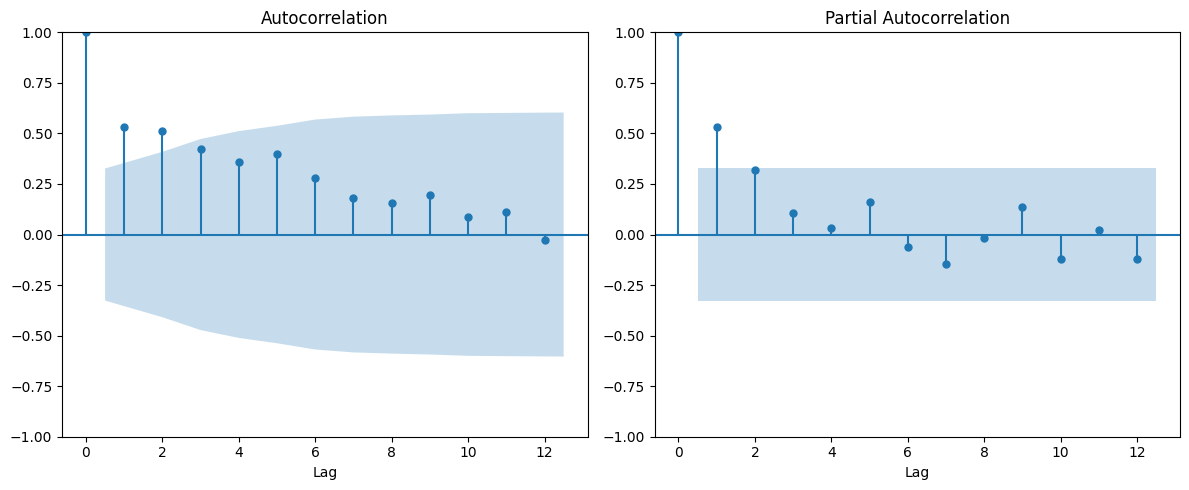

In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df["Sales"], lags=12, ax=axes[0])
axes[0].set_xlabel('Lag')
plot_pacf(df["Sales"], lags=12, ax=axes[1])
axes[1].set_xlabel('Lag')

plt.tight_layout()
plt.show()

`Note:` Khi quy luật mùa vụ có chu kỳ $s$ thì hệ số tương quan theo các độ trễ $ks, k \in \mathbb{Z}^+$ sẽ lớn hơn những hệ số tương quan với các độ trễ khác. Do đó, chỉ cần tìm khoảng cách về độ trễ giữa các cực đại địa phương trong đồ thị pacf là có thể tìm ra quy luật mùa vụ.

<img src="https://imgur.com/zhl44t8.png" alt="image" width="300"/>

`Note:` các độ trễ có hệ số tự tương quan cực đại là 1, 5, 9. 4 là khoảng cách của các độ trễ trên, do đó chuỗi có chu kỳ mùa vụ là 4.

## Xử lý dữ liệu khuyết

Cho $(x_1, y_1)$ và $(x_2, y_2)$ ứng với điểm bắt đầu và điểm kết thúc. Giá trị khuyết $y$ cần nội suy tại thời điểm $x$:

$$y = y_1 + (x-x_1) \times \frac{y_2-y_1}{x_2-x_1}$$

2 phương pháp chính:

- nội suy tuyến tính (interpolate): dùng khi dữ liệu khuyết **nằm giữa** hai đầu mút.

<img src="https://imgur.com/bdqmTzO.png" alt="image" width="500"/>

- ngoại suy tuyến tính (extrapolate): dùng khi dữ liệu khuyết **nằm ngoài** hai đầu mút.

<img src="https://imgur.com/RqGuPoF.png" alt="image" width="500"/>

In [86]:
import numpy as np

def _interpolate(p1, p2, x):
  """
  p1: start point (x1, y1)
  p2: end point (x2, y2)
  """
  x1, y1 = p1
  x2, y2 = p2
  y = y1 + (x-x1)*(y2-y1)/(x2-x1)
  return y
  
# giả định chuỗi bị khuyết tại indice=1
df["Sales"].iloc[1] = np.nan

p1 = (0, df["Sales"].iloc[0])
p2 = (2, df["Sales"].iloc[2])
x = 1
print(p1, p2)
print("interpolation value at x=1: ", _interpolate(p1, p2, 1))

(0, 266.0) (2, 183.1)
interpolation value at x=1:  224.55


Pandas đã tích hợp sẵn các hàm nội suy.

In [87]:
df["Sales"].iloc[1] = np.nan
method = ['linear', 'polinormial']
limit_direction = [
        'forward', # nội suy
        'backward' # ngoại suy
    ]
df.interpolate(method=method[0], limit_direction=limit_direction[0], axis=0, inplace=True)
df.head(3)

,Sales
Month,
2001-01-01,266.00
2001-02-01,224.55
2001-03-01,183.10


## Trung bình trượt (moving average)

`Định nghĩa:` là phương pháp làm mịn bằng cách lấy trung bình của chuỗi $x_t$ trong một khung thời gian $w$ liền trước $t$. 

`Tác dụng:` giảm nhiễu, theo dõi giao động trong ngắn hạn và nhận biết được xu hướng trong dài hạn. 

`2 dạng chính:` 

- **Trung bình trượt đơn (Single Moving Average)** xem độ quan trọng (trọng số) của dữ liệu hiện tại và qua khứ là như nhau (Lag Characteristics).

$$SMA_t = \frac{\sum_{j=t-w}^{t} x_i}{w}$$

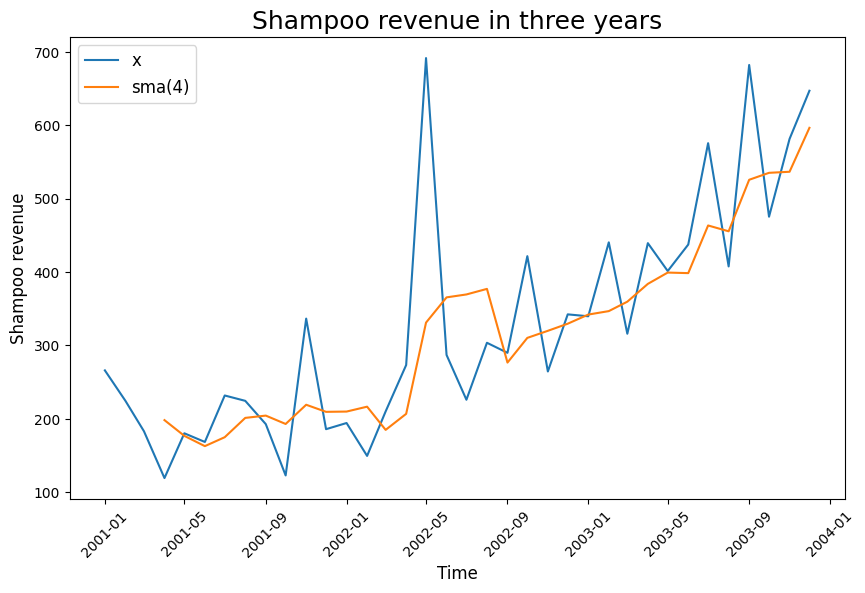

In [88]:
df_sma = df.rolling(window=4).mean()

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], label="x")
plt.plot(df_sma["Sales"], label="sma(4)")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.legend(fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

- **Trung bình trượt cấp số nhân (Exponential Weighted Moving Average)** quan tâm đến dữ liệu gần đây (trọng số lớn hơn) hơn là dữ liệu cũ.

$$\text{EWMA}(w)=\alpha\times x(w)+1(1-\alpha)\times \text{EWMA}(w-1)$$

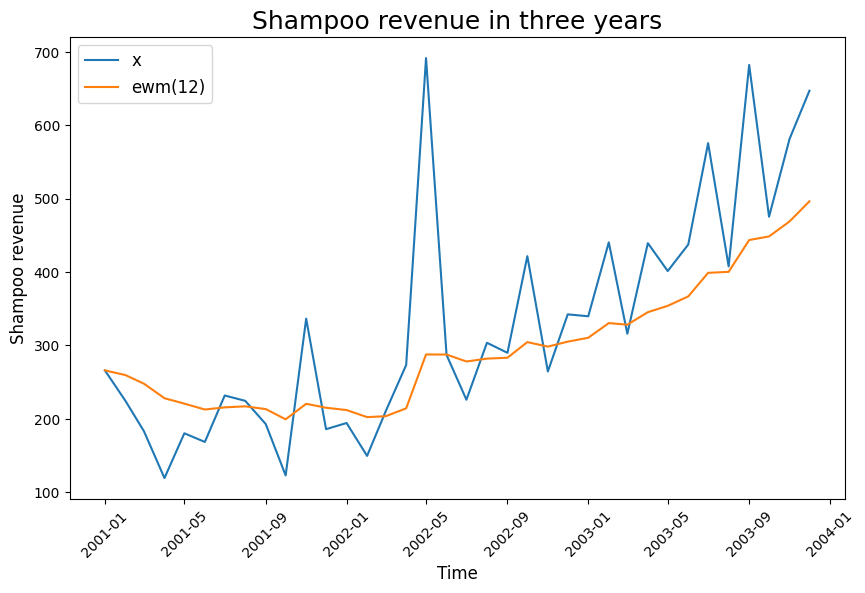

In [89]:
df_ewm = df.ewm(span=12, adjust=False).mean()

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], label="x")
plt.plot(df_ewm["Sales"], label="ewm(12)")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.legend(fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

## Loại bỏ yếu tố xu hướng (Differencing)

Giả định chuỗi tuân theo phương trình tuyến tính với thời gian. Chuỗi sau khi loại bỏ xu thế:
$$x_t' = x_t - \alpha t$$

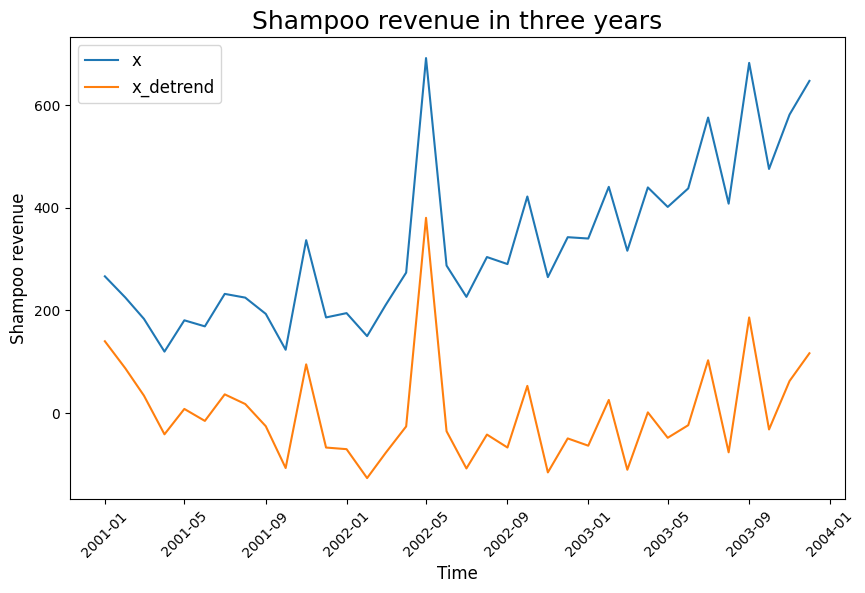

In [90]:
from scipy import signal

x_detrend = signal.detrend(df["Sales"])
df_detrend = pd.DataFrame({"Sales_Detrend": x_detrend}, index=df.index)

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], label="x")
plt.plot(df_detrend, label="x_detrend")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.legend(fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

## Phân rã mùa vụ

Mô hình dự báo sẽ chuẩn xác hơn nếu loại bỏ yếu tố mùa vụ. Có 2 mô hình dùng để loại bỏ yếu tố mùa vụ:   

**1. mô hình cộng tính (multiplicative model)**

Có phương trình hồi qui là tổng các thành phần mùa vụ và thời gian: 

$$x_t = T_t + S_t + e_t$$

Trong đó,
- $x_t$ là giá trị chuỗi.
- $T_t$ là ảnh hưởng của yếu tố xu hướng
- $S_t$ là ảnh hưởng của yếu tố mùa vụ.
- $e_t$ là phần dư hoặc sai số dự báo. 

`Note:` ảnh hưởng của $S_t$ lên $x_t$ có hệ số không đổi nên tạo ra khác biệt tuyến tính trong tương lai lên chuỗi. 

`Do đó:` phù hợp với chuỗi có biến động ổn định theo thời gian.

**2. mô hình nhân tính (addictive model)**

Có phương trình hồi qui thể hiện qua phép tính nhân: 
$$x_t = T_t * S_t * e_t$$

`Note:` ảnh hưởng của $S_t$ lên $x_t$ đã gia tăng theo cấp số $T_t$ theo thời gian.

`Do đó:` phù hợp với chuỗi có độ biến động gia tăng theo thời gian.

Dưới đây là ví dụ về chuỗi shampoo và chuỗi biến đổi nhân tính của shampoo.

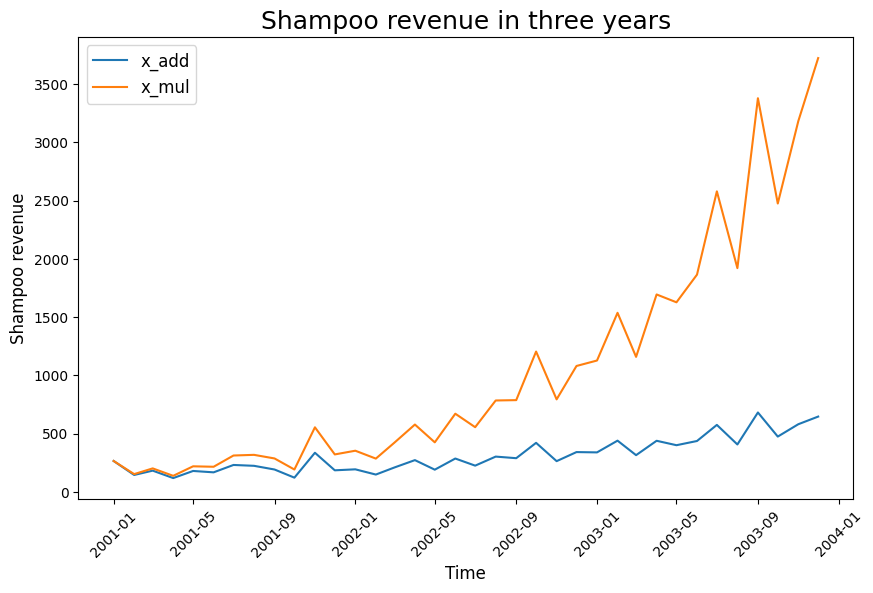

In [91]:
url = "https://raw.githubusercontent.com/phamdinhkhanh/tabml/main/sales-of-shampoo-over-a-three-ye.csv"
df = pd.read_csv(url, header=0)
df["Month"] = df['Month'].apply(lambda x: pd.to_datetime("200"+x))
df.set_index("Month", inplace=True)

# Tạo chuỗi nhân tính
multip = np.arange(df.shape[0])
multip = np.exp(multip/20)
df_mul = df.copy()
df_mul["Sales"] = df_mul["Sales"]*multip

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], label="x_add")
plt.plot(df_mul["Sales"], label="x_mul")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.legend(fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

`Note:` 
- đường màu cam nên sử dụng mô hình nhân tính vì phương sai thay đổi theo thời gian.
- đường màu xanh nên sử dụng mô hình cộng tính vì phương sai  ổn định theo thời gian.

Dùng `statsmodels` module để phân rã mùa vụ.

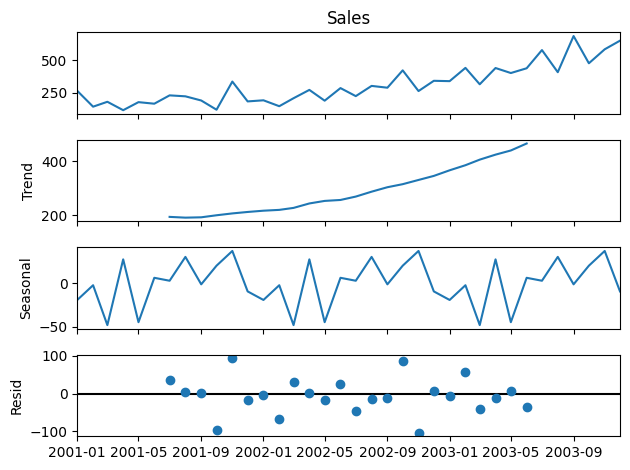

In [92]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# dùng mô hình cộng tính
result = seasonal_decompose(df["Sales"], model='additive')
result.plot()
plt.show()

Cách lấy các thành phần seasonality, trend, residual (nhiễu sau khi đã loại bỏ trend và seasonality)

In [93]:
print(result.resid.shape)
print(result.seasonal.shape)
print(result.trend.shape)

(36,)
(36,)
(36,)


## Time Series Forecasting

### Methods Summary

**Classical Methods**

- Moving Average (MA)
- Autoregressive (AR) Models
- Autoregressive Integrated Moving Average (ARIMA)
    - Suitable for non-seasonal data, ARIMA can model the autocorrelations in the data.

**Advanced Methods**

- Seasonal ARIMA (SARIMA)
    - Extends ARIMA to handle seasonality, making it ideal for data with seasonal patterns.
- Exponential Smoothing State Space Model (ETS)

**Machine Learning Approaches**

- Linear Regression
- Decision Trees and Random Forests
- Support Vector Machines (SVM)
- Neural Networks (RNN, LSTM)

### Splitting dataset

In [94]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Sales'], autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'số lượng lags: {result[2]}')

ADF Statistic: 3.0601420836411815
p-value: 1.0
số lượng lags: 10


`Note:` p-value > 0.05 chuỗi có thể không dừng

In [95]:
train = df[:int(len(df)*0.9)] # 90% for train
test = df[int(len(df)*0.9):]

### AR Model

#### Khởi tạo model

In [112]:
from statsmodels.tsa.ar_model import AutoReg
ar = AutoReg(train, lags=10).fit()
ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   32
Model:                    AutoReg(10)   Log Likelihood                -115.554
Method:               Conditional MLE   S.D. of innovations             46.224
Date:                Sat, 05 Oct 2024   AIC                            255.108
Time:                        21:25:36   BIC                            268.200
Sample:                    11-01-2001   HQIC                           258.192
                         - 08-01-2003                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.7078     45.176     -0.967      0.333    -132.252      44.836
Sales.L1      -0.3094      0.179     -1.729      0.084      -0.660       0.041
Sales.L2       0.4300      0.203      2.119      0.034       0.032       0.828
Sales.L3       0.3315      0.197      1.683      0.092      -0.055       0.718
Sales.L4       0.5251      0.203      2.583      0.010       0.127       0.924
Sales.L5       0.2584      0.233      1.107      0.268      -0.199       0.716
Sales.L6      -0.1868      0.242     -0.771      0.441      -0.662       0.288
Sales.L7      -0.0993      0.215     -0.462      0.644      -0.521       0.322
Sales.L8      -0.2836      0.211     -1.341      0.180      -0.698       0.131
Sales.L9       0.3249      0.216      1.505      0.132      -0.098       0.748
Sales.L10      0.4291      0.196      2.185      0.029       0.044       0.814
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9373           -0.0000j            0.9373           -0.0000
AR.2             1.0025           -0.5712j            1.1538           -0.0824
AR.3             1.0025           +0.5712j            1.1538            0.0824
AR.4             0.2071           -1.0272j            1.0479           -0.2183
AR.5             0.2071           +1.0272j            1.0479            0.2183
AR.6            -0.4287           -0.9994j            1.0875           -0.3145
AR.7            -0.4287           +0.9994j            1.0875            0.3145
AR.8            -0.9673           -0.3902j            1.0431           -0.4390
AR.9            -0.9673           +0.3902j            1.0431            0.4390
AR.10           -1.3217           -0.0000j            1.3217           -0.5000
------------------------------------------------------------------------------
"""

#### Dự đoán trên tập test

In [113]:
pred = ar.predict(start=len(train), end=len(df)-1, dynamic=False)
pred = pd.DataFrame(pred.values, index=test.index, columns=['Sales'])
pred.head()

,Sales
Month,
2003-09-01,572.525940
2003-10-01,497.518733
2003-11-01,679.579475
2003-12-01,557.978543


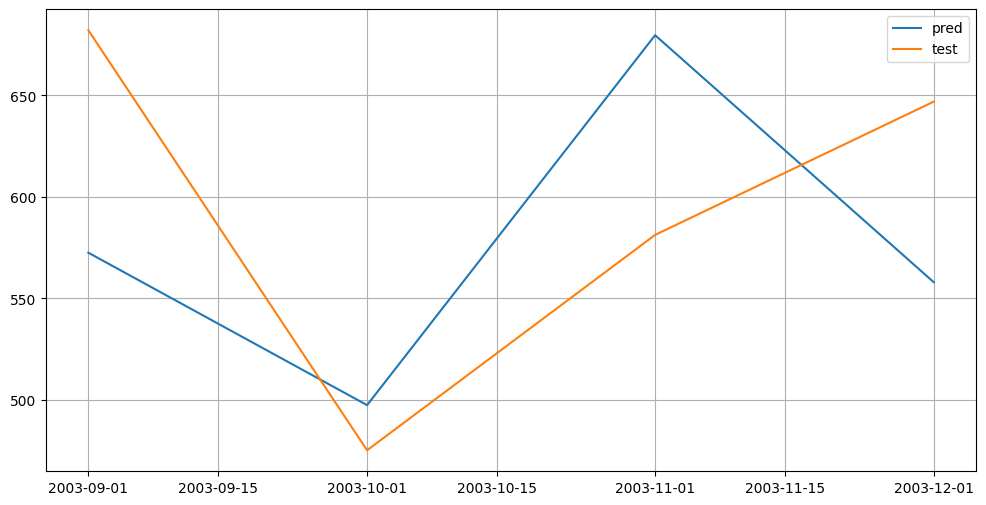

In [114]:
plt.figure(figsize=(12,6))
plt.plot(pred, label='pred')
plt.plot(test, label='test')
plt.legend()
plt.grid()

#### Tính độ lỗi

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

ar_mae = mean_absolute_error(test, pred)
ar_mse = mean_squared_error(test, pred)
ar_rmse = np.sqrt(ar_mse)
ar_mape = np.mean(np.abs((test - pred) / test))

print(f'AR MAE: {ar_mae}, MSE: {ar_mse}, RMSE: {ar_rmse}, MAPE: {ar_mape}')

AR MAE: 79.72343126032821
MSE: 7511.0306794460885, RMSE: 86.66620263658774, MAPE: 0.12844803473295222


#### Dự đoán tương lai

In [103]:
num_next_day = 10
pred_future = ar.predict(start=len(df) + 1, end=len(df) + num_next_day, dynamic=False)
print(f'Dự đoán Sales sau {num_next_day} ngày kế kể từ thời điểm cuối trong tập train')
pred_future = pd.DataFrame(pred_future.values, index=pd.date_range(start=df.index[-1], periods=10, freq='1T'), columns=['Sales'])
print(pred_future)

Dự đoán Sales sau 10 ngày kế kể từ thời điểm cuối trong tập train
                           Sales
2003-12-01 00:00:00   687.958724
2003-12-01 00:01:00   701.453286
2003-12-01 00:02:00   831.881011
2003-12-01 00:03:00   760.194515
2003-12-01 00:04:00   891.329304
2003-12-01 00:05:00   865.130803
2003-12-01 00:06:00  1023.960263
2003-12-01 00:07:00  1007.405334
2003-12-01 00:08:00  1070.011025
2003-12-01 00:09:00  1165.807236


### ARIMA Model

#### Chọn siêu tham số cho ARIMA

In [105]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Sales'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=403.573, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=404.633, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.463, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -195.731
Date:                Sat, 05 Oct 2024   AIC                            401.463
Time:                        21:14:45   BIC                            409.240
Sample:                    01-01-2001   HQIC                           404.147
                         - 12-01-2003                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.3070      6.176      1.507      0.132      -2.798      21.412
ar.L1          0.0889      0.314      0.283      0.777      -0.526       0.704
ma.L1         -1.3866      0.314     -4.415      0.000      -2.002      -0.771
ma.L2          0.9420      0.448      2.104      0.035       0.065       1.819
sigma2      3698.0900   1454.596      2.542      0.011     847.134    6549.046
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.64   Prob(JB):                         0.67
Heteroskedasticity (H):               0.95   Skew:                             0.30
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Khởi tạo model

In [106]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['Sales'], order=(1,1,2)).fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   32
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -175.327
Date:                Sat, 05 Oct 2024   AIC                            358.655
Time:                        21:17:09   BIC                            364.391
Sample:                    01-01-2001   HQIC                           360.524
                         - 08-01-2003                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6698      0.381     -1.757      0.079      -1.417       0.077
ma.L1         -0.1579      0.451     -0.350      0.727      -1.043       0.727
ma.L2         -0.1354      0.408     -0.332      0.740      -0.935       0.664
sigma2      4679.0787   1291.599      3.623      0.000    2147.590    7210.567
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.64   Prob(JB):                         0.49
Heteroskedasticity (H):               1.08   Skew:                             0.50
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Dự đoán trên tập test

In [107]:
pred = model_arima.predict(start=len(train), end=len(df)-1, typ='levels')
pred = pd.DataFrame(pred.values, index=test.index, columns=['Sales'])
pred.head()

,Sales
Month,
2003-09-01,503.761978
2003-10-01,445.422363
2003-11-01,484.495366
2003-12-01,458.326191


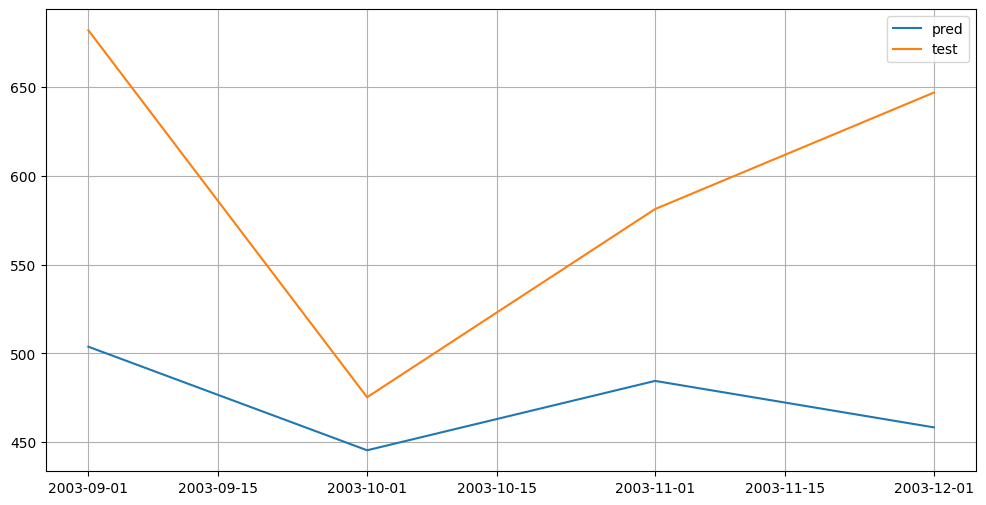

In [110]:
plt.figure(figsize=(12,6))
plt.plot(pred, label='pred')
plt.plot(test, label='test')
plt.legend()
plt.grid()

#### Tính độ lỗi

In [115]:
arima_mae = mean_absolute_error(test, pred)
arima_mse = mean_squared_error(test, pred)
arima_rmse = np.sqrt(arima_mse)
arima_mape = np.mean(np.abs((test - pred) / test))

print(f'AR MAE: {arima_mae}, MSE: {arima_mse}, RMSE: {arima_rmse}, MAPE: {arima_mape}')

AR MAE: 79.72343126032821, MSE: 7511.0306794460885, RMSE: 86.66620263658774, MAPE: 0.12844803473295222


#### Dự đoán tương lai

In [116]:
num_next_day = 10
pred_future = model_arima.predict(start=len(df) + 1, end=len(df) + num_next_day, dynamic=False)
print(f'Dự đoán Sales sau {num_next_day} ngày kế kể từ thời điểm cuối trong tập train')
pred_future = pd.DataFrame(pred_future.values, index=pd.date_range(start=df.index[-1], periods=10, freq='1T'), columns=['Sales'])
print(pred_future)

Dự đoán Sales sau 10 ngày kế kể từ thời điểm cuối trong tập train
                          Sales
2003-12-01 00:00:00  464.114411
2003-12-01 00:01:00  471.976352
2003-12-01 00:02:00  466.710811
2003-12-01 00:03:00  470.237411
2003-12-01 00:04:00  467.875468
2003-12-01 00:05:00  469.457381
2003-12-01 00:06:00  468.397893
2003-12-01 00:07:00  469.107486
2003-12-01 00:08:00  468.632236
2003-12-01 00:09:00  468.950535


### Mô hình LSTM

#### Ước tính chu kỳ bằng Fourier Transform

In [117]:
fft = np.fft.fft(df['Sales'])
frequencies = np.fft.fftfreq(len(fft))

# Tìm tần số có biên độ lớn nhất
amplitudes = np.abs(fft)
peak_frequency = frequencies[np.argmax(amplitudes[1:]) + 1]  # bỏ qua tần số 0

period = int(1 / peak_frequency)
print(f"Chu kỳ ước tính là: {period}")

Chu kỳ ước tính là: 36


[]

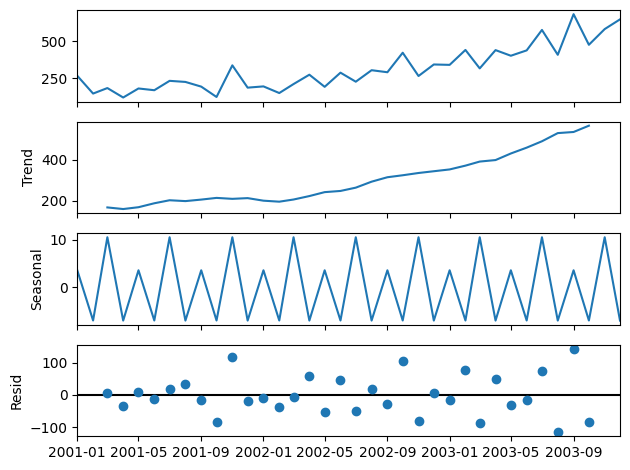

In [119]:
result = seasonal_decompose(df, model='additive', period=4)
result.plot()
plt.plot()

#### Chuẩn hóa data

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

#### Khởi tạo model

In [121]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [122]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

lstm = Sequential()
lstm.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mse')

In [123]:
lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

#### Training model

In [125]:
lstm.fit(generator, epochs=50)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3571
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5333
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5420
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3609
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2350 
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3684
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3608
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2479
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3551
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4247
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4724
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4175
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2213
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4721
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3023
Epoch 16/50
22/22 

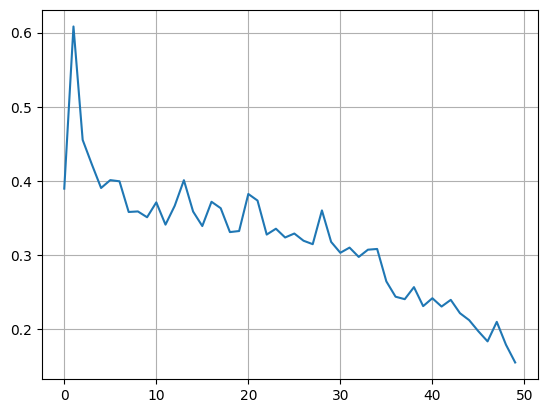

In [127]:
loss_per_epoch = lstm.history.history['loss']
plt.grid()
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

#### Load and save model

In [ ]:
# from tensorflow.keras.models import load_model
# # lstm.save('lstm.keras')
# lstm = load_model('lstm.keras')

#### Dự đoán trên tập test

In [128]:
current_batch = scaled_train[-n_input:].reshape((1, n_input, n_features))
lstm.predict(current_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


array([[2.252826]], dtype=float32)

In [129]:
def lstm_predict(model, n_min_from_last_train_record):
    current_batch = scaled_train[-n_input:].reshape((1, n_input, n_features))
    preds = []
    for i in range(n_min_from_last_train_record):
        current_pred = model.predict(current_batch, verbose=False)[0]
        preds.append(current_pred)
        current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
    true_preds = scaler.inverse_transform(preds)
    return true_preds

true_test_preds = lstm_predict(lstm, len(test))

In [130]:
df_true_test_preds = pd.DataFrame(true_test_preds, index=test.index, columns=['Close'])
df_true_test_preds

,Close
Month,
2003-09-01,525.588317
2003-10-01,521.878257
2003-11-01,584.777329
2003-12-01,591.979649


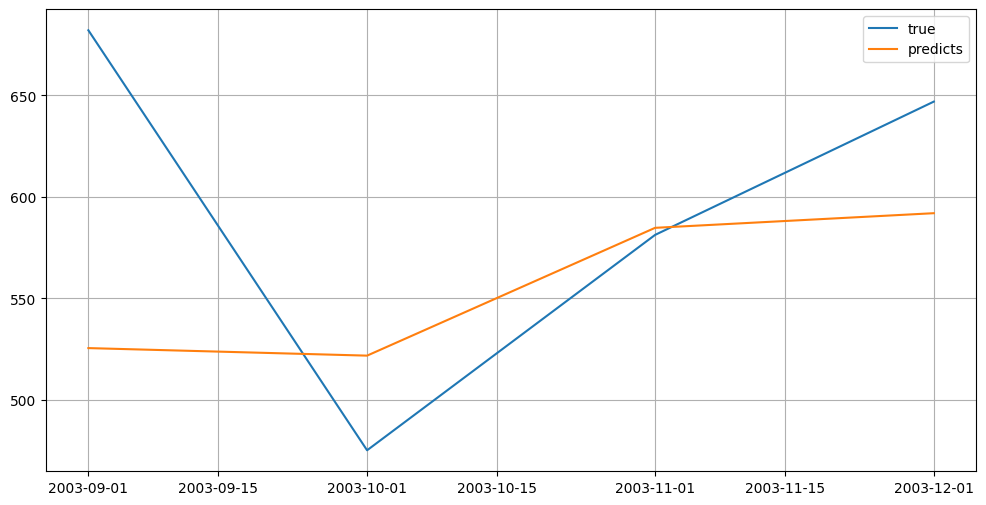

In [132]:
plt.figure(figsize=(12,6))
plt.plot(test['Sales'], label='true')
plt.plot(df_true_test_preds, label='predicts')
plt.legend()
plt.grid()

#### Tính độ lỗi

In [135]:
lstm_mae = mean_absolute_error(test, true_test_preds)
lstm_mse = mean_squared_error(test, true_test_preds)
lstm_rmse = np.sqrt(arima_mse)
lstm_mape = np.mean(np.abs((test - true_test_preds) / test))

print(f'AR MAE: {lstm_mae}, MSE: {lstm_mse}, RMSE: {lstm_rmse}, MAPE: {lstm_mape}')

AR MAE: 65.34690515754902, MSE: 7415.621377298647, RMSE: 86.66620263658774, MAPE: 0.10455499284955307


#### Dự đoán tương lai

In [140]:
# Dự đoán Sales 10 ngày kế kể từ thời điểm cuối trong tập train.
num_next_day = 10
pred_future = lstm_predict(lstm, num_next_day)
pred_future = pd.DataFrame(pred_future, index=pd.date_range(start=df.index[-1], periods=10, freq='1T'), columns=['Sales'])
pred_future

,Sales
2003-12-01 00:00:00,525.588317
2003-12-01 00:01:00,521.878257
2003-12-01 00:02:00,584.777329
2003-12-01 00:03:00,591.979649
2003-12-01 00:04:00,644.065631
2003-12-01 00:05:00,687.482492
2003-12-01 00:06:00,739.194536
2003-12-01 00:07:00,816.008640
2003-12-01 00:08:00,893.010593
2003-12-01 00:09:00,950.713346


# Further Study

[Statistics: Time Series Analysis — Compilation of the fundamental concepts](https://medium.com/intuition/statistics-time-series-analysis-compilation-of-the-fundamental-concepts-7c3799953a0b)

[Statistics: Multivariate time series analysis — fundamental concepts, VMA, VAR and VARMA](https://medium.com/intuition/statistics-multivariate-time-series-analysis-vma-var-varma-3cb1fbac5553#653a)

# Tham khảo

https://online.stat.psu.edu/stat510/lesson/5/5.1

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

https://medium.com/@nomannayeem/comprehensive-guide-to-time-series-data-analytics-and-forecasting-with-python-2c82de2c8517